# Handwritten Digits - MNIST GAN First Attempt

Make Your First GAN With PyTorch, 2020

In [1]:
from rich import print

## import libraries

In [2]:
import random

import torch
import torch.nn as nn

import pandas as pd
import numpy
import matplotlib.pyplot as plt

## Dataset Class

In [3]:
import mnist_data

In [4]:
# load training data

train_csv = mnist_data.datadir.joinpath('mnist_train.csv')
mnist_dataset = mnist_data.MnistDataset(train_csv)

<Figure size 432x288 with 1 Axes>

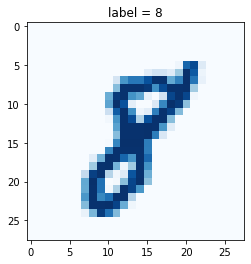

In [5]:
mnist_dataset.plot_image(17)

## Data Functions

In [6]:
# function to generate uniform random data

def generate_random(size):
    random_data = torch.rand(size)
    return random_data

## Discriminator Network

The only difference between MNIST Discriminator and Classifier is that the output layer of Discriminator has only one node. 

In [7]:
from mnist_classifier import Classifier as Discriminator

In [8]:
model = nn.Sequential(
    nn.Linear(784, 200),
    nn.Sigmoid(),
    nn.Linear(200, 1),
    nn.Sigmoid()
)

D = Discriminator(model)

In [9]:
print(f"{D.model = }")
print(f'{D.loss_function = }')
print(f'{D.optimiser = }')

D.model = Sequential(
  (0): Linear(in_features=784, out_features=200, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=200, out_features=1, bias=True)
  (3): Sigmoid()
)

D.loss_function = MSELoss()

D.optimiser = SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0
    nesterov: False
    weight_decay: 0
)

## Train and Test Discriminator

In [10]:
%%time
# test discriminator can separate real data from random noise

for label, image_data_tensor, target_tensor in mnist_dataset:
    # real data
    D.train(image_data_tensor, torch.FloatTensor([1.0]), print_counter=True)
    # fake data
    D.train(generate_random(784), torch.FloatTensor([0.0]), print_counter=True)

counter =  10000

counter =  20000

counter =  30000

counter =  40000

counter =  50000

counter =  60000

counter =  70000

counter =  80000

counter =  90000

counter =  100000

counter =  110000

counter =  120000

CPU times: user 29min 30s, sys: 31min 40s, total: 1h 1min 10s
Wall time: 4min 26s


<Figure size 1152x576 with 1 Axes>

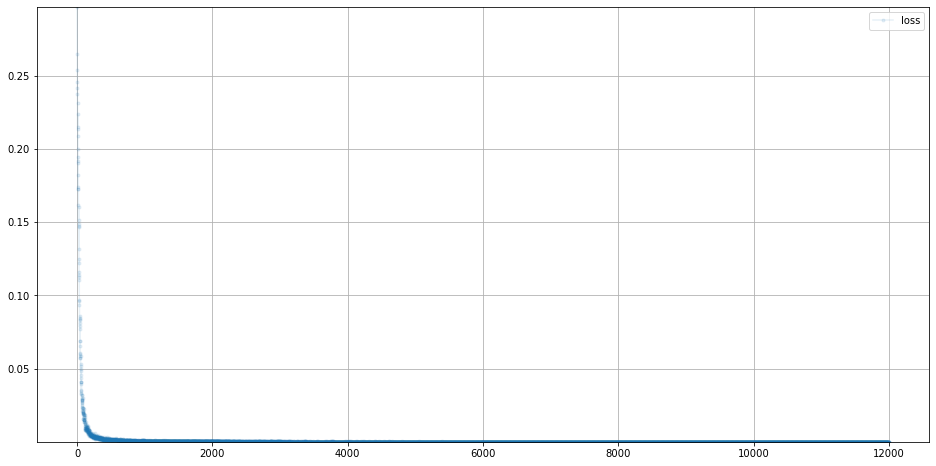

In [11]:
# plot discriminator loss

D.plot_progress()
# D.plot_progress(xlim=(0, 20000))

In [12]:
# manually run discriminator to check it can tell real data from fake

for i in range(4):
    image_data_tensor = mnist_dataset[random.randint(0, 60000)][1]
    print(f"{D.forward(image_data_tensor).item():.3f}")

for i in range(4):
    print(f"{D.forward(generate_random(784)).item():.2e}")

0.998

0.994

0.998

0.995

6.50e-03

6.06e-03

6.72e-03

5.68e-03

## Generator Network

In [13]:
from mnist_generator import Generator

## Test Generator Output

<matplotlib.image.AxesImage object at 0x7f798b0de8b0>

<Figure size 432x288 with 1 Axes>

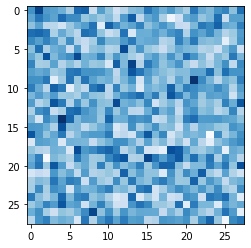

In [14]:
# check the generator output is of the right type and shape

G = Generator()

output = G.forward(generate_random(1))

img = output.detach().numpy().reshape(28, 28)

plt.imshow(img, interpolation='none', cmap='Blues')

In [15]:
print(f"{G.model = }")
print(f'{G.optimiser = }')

G.model = Sequential(
  (0): Linear(in_features=1, out_features=200, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=200, out_features=784, bias=True)
  (3): Sigmoid()
)

G.optimiser = SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0
    nesterov: False
    weight_decay: 0
)

## Train GAN

In [16]:
%%time 

# create Discriminator and Generator

D = Discriminator(model)
G = Generator()

# train Discriminator and Generator

for label, image_data_tensor, target_tensor in mnist_dataset:

    # train discriminator on true
    D.train(image_data_tensor, torch.FloatTensor([1.0]), print_counter=True)
    
    # train discriminator on false
    # use detach() so gradients in G are not calculated
    D.train(G.forward(generate_random(1)).detach(), torch.FloatTensor([0.0]), print_counter=True)
    
    # train generator
    G.train(D, generate_random(1), torch.FloatTensor([1.0]))

counter =  10000

counter =  20000

counter =  30000

counter =  40000

counter =  50000

counter =  60000

counter =  70000

counter =  80000

counter =  90000

counter =  100000

counter =  110000

counter =  120000

CPU times: user 55min 20s, sys: 1h 3min 2s, total: 1h 58min 23s
Wall time: 7min 53s


<Figure size 1152x576 with 1 Axes>

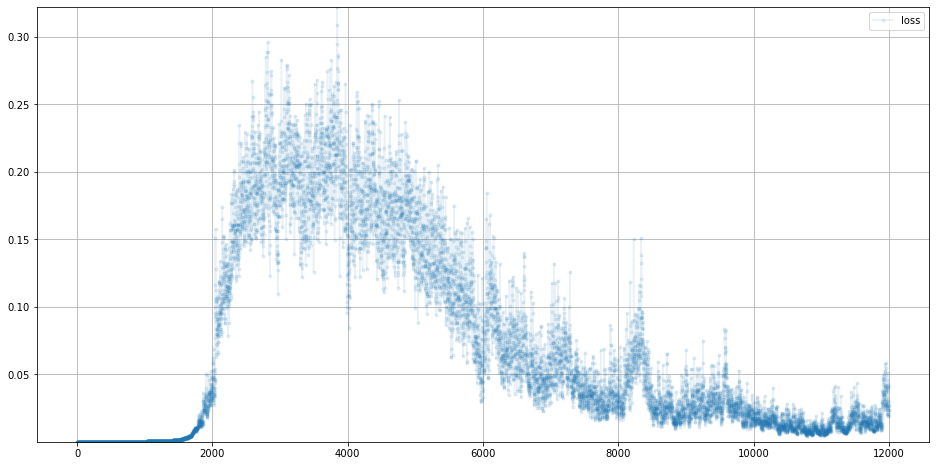

In [17]:
# plot discriminator error

D.plot_progress()

<Figure size 1152x576 with 1 Axes>

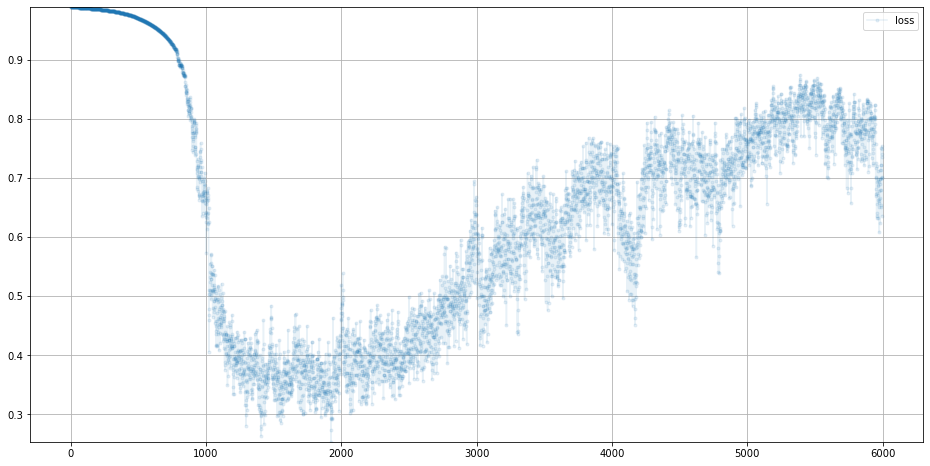

In [18]:
# plot generator error

G.plot_progress()

## Run Generator

<Figure size 1152x576 with 6 Axes>

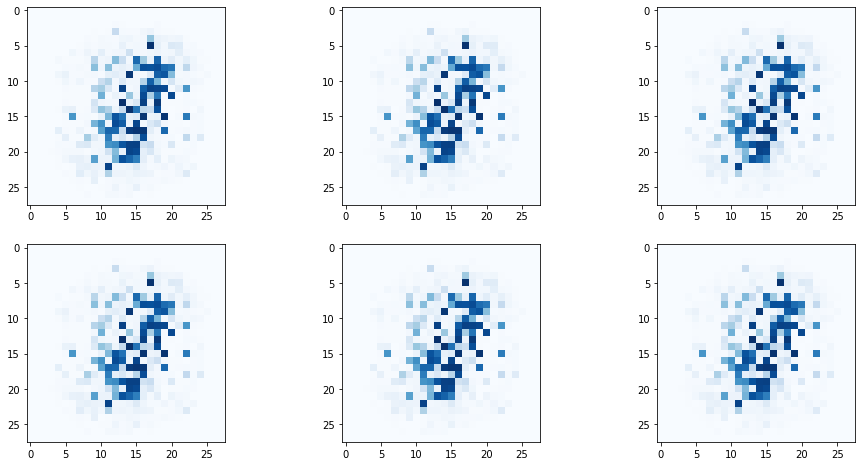

In [28]:
# plot several outputs from the trained generator

# plot a 3 column, 2 row array of generated images
f, axarr = plt.subplots(2,3, figsize=(16,8))
for i in range(2):
    for j in range(3):
        output = G.forward(generate_random(1))
        if mnist_dataset.device.type == 'cuda':
            output = output.cpu()
        img = output.detach().numpy().reshape(28,28)
        axarr[i,j].imshow(img, interpolation='none', cmap='Blues')